In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv = pd.read_csv("./dataset/kaggle/train.csv")
csv.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [3]:
df = pd.read_parquet("/home/karthikssalian/work/RWKV-PEFT/sign/dataset/kaggle/train_landmark_files/2044/635217.parquet")

In [4]:
df.head()

,frame,row_id,type,landmark_index,x,y,z
0,22,22-face-0,face,0,0.438251,0.449453,-0.047826
1,22,22-face-1,face,1,0.414527,0.404880,-0.071994
2,22,22-face-2,face,2,0.423745,0.420681,-0.042145
3,22,22-face-3,face,3,0.402349,0.372041,-0.043906
4,22,22-face-4,face,4,0.411857,0.393013,-0.074747


In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [6]:
def get_hand_points(hand):
    x = [[hand.iloc[0].x, hand.iloc[1].x, hand.iloc[2].x, hand.iloc[3].x, hand.iloc[4].x], # Thumb
         [hand.iloc[5].x, hand.iloc[6].x, hand.iloc[7].x, hand.iloc[8].x], # Index
         [hand.iloc[9].x, hand.iloc[10].x, hand.iloc[11].x, hand.iloc[12].x], 
         [hand.iloc[13].x, hand.iloc[14].x, hand.iloc[15].x, hand.iloc[16].x], 
         [hand.iloc[17].x, hand.iloc[18].x, hand.iloc[19].x, hand.iloc[20].x], 
         [hand.iloc[0].x, hand.iloc[5].x, hand.iloc[9].x, hand.iloc[13].x, hand.iloc[17].x, hand.iloc[0].x]]

    y = [[hand.iloc[0].y, hand.iloc[1].y, hand.iloc[2].y, hand.iloc[3].y, hand.iloc[4].y],  #Thumb
         [hand.iloc[5].y, hand.iloc[6].y, hand.iloc[7].y, hand.iloc[8].y], # Index
         [hand.iloc[9].y, hand.iloc[10].y, hand.iloc[11].y, hand.iloc[12].y], 
         [hand.iloc[13].y, hand.iloc[14].y, hand.iloc[15].y, hand.iloc[16].y], 
         [hand.iloc[17].y, hand.iloc[18].y, hand.iloc[19].y, hand.iloc[20].y], 
         [hand.iloc[0].y, hand.iloc[5].y, hand.iloc[9].y, hand.iloc[13].y, hand.iloc[17].y, hand.iloc[0].y]] 
    return x, y

def get_pose_points(pose):
    x = [[pose.iloc[8].x, pose.iloc[6].x, pose.iloc[5].x, pose.iloc[4].x, pose.iloc[0].x, pose.iloc[1].x, pose.iloc[2].x, pose.iloc[3].x, pose.iloc[7].x], 
         [pose.iloc[10].x, pose.iloc[9].x], 
         [pose.iloc[22].x, pose.iloc[16].x, pose.iloc[20].x, pose.iloc[18].x, pose.iloc[16].x, pose.iloc[14].x, pose.iloc[12].x, 
          pose.iloc[11].x, pose.iloc[13].x, pose.iloc[15].x, pose.iloc[17].x, pose.iloc[19].x, pose.iloc[15].x, pose.iloc[21].x], 
         [pose.iloc[12].x, pose.iloc[24].x, pose.iloc[26].x, pose.iloc[28].x, pose.iloc[30].x, pose.iloc[32].x, pose.iloc[28].x], 
         [pose.iloc[11].x, pose.iloc[23].x, pose.iloc[25].x, pose.iloc[27].x, pose.iloc[29].x, pose.iloc[31].x, pose.iloc[27].x], 
         [pose.iloc[24].x, pose.iloc[23].x]
        ]

    y = [[pose.iloc[8].y, pose.iloc[6].y, pose.iloc[5].y, pose.iloc[4].y, pose.iloc[0].y, pose.iloc[1].y, pose.iloc[2].y, pose.iloc[3].y, pose.iloc[7].y], 
         [pose.iloc[10].y, pose.iloc[9].y], 
         [pose.iloc[22].y, pose.iloc[16].y, pose.iloc[20].y, pose.iloc[18].y, pose.iloc[16].y, pose.iloc[14].y, pose.iloc[12].y, 
          pose.iloc[11].y, pose.iloc[13].y, pose.iloc[15].y, pose.iloc[17].y, pose.iloc[19].y, pose.iloc[15].y, pose.iloc[21].y], 
         [pose.iloc[12].y, pose.iloc[24].y, pose.iloc[26].y, pose.iloc[28].y, pose.iloc[30].y, pose.iloc[32].y, pose.iloc[28].y], 
         [pose.iloc[11].y, pose.iloc[23].y, pose.iloc[25].y, pose.iloc[27].y, pose.iloc[29].y, pose.iloc[31].y, pose.iloc[27].y], 
         [pose.iloc[24].y, pose.iloc[23].y]
        ]
    return x, y

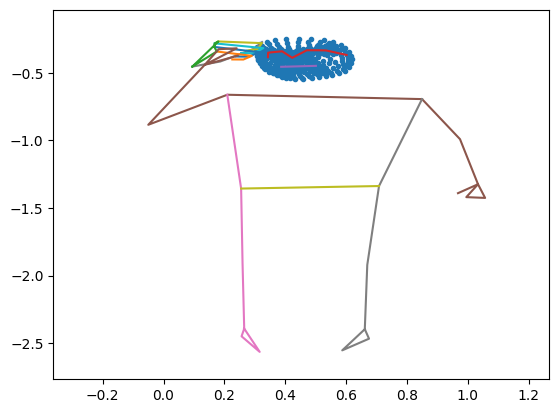

In [15]:
sign = df.copy()
sign.y = -sign.y  # Invert y axis for plotting
def animation_frame(f):
    frame = sign[sign.frame==f]
    left = frame[frame.type=='left_hand']
    right = frame[frame.type=='right_hand']
    pose = frame[frame.type=='pose']
    face = frame[frame.type=='face'][['x', 'y']].values
    lx, ly = get_hand_points(left)
    rx, ry = get_hand_points(right)
    px, py = get_pose_points(pose)
    ax.clear()
    ax.plot(face[:,0], face[:,1], '.')
    for i in range(len(lx)):
        ax.plot(lx[i], ly[i])
    for i in range(len(rx)):
        ax.plot(rx[i], ry[i])
    for i in range(len(px)):
        ax.plot(px[i], py[i])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
        
## These values set the limits on the graph to stabilize the video
xmin = sign.x.min() - 0.2
xmax = sign.x.max() + 0.2
ymin = sign.y.min() - 0.2
ymax = sign.y.max() + 0.2

fig, ax = plt.subplots()
# l, = ax.plot([], [])
animation = FuncAnimation(fig, func=animation_frame, frames=sign.frame.unique())

HTML(animation.to_html5_video())

In [ ]:
df[df.landmark_index.duplicated()]

In [ ]:
d = df[df.frame==22]

In [ ]:
pd.set_option('display.max_rows', None) 
d[d.landmark_index.duplicated()]

In [ ]:
d[d.type=="face"]

In [ ]:
import numpy as np

ROWS_PER_FRAME = 543
points_per_type = {
    "face": 468,
    "left_hand": 21,
    "right_hand": 21,
    "pose": 33
}

offset_map = {}
offset = 0
for t in ["face", "left_hand", "right_hand", "pose"]:
    count = points_per_type[t]
    offset_map[t] = offset
    offset += count

def align_dataset(frame_df):
    holder = np.zeros((543, 3))
    for _, row in frame_df.iterrows():
        landmark_index = row["landmark_index"]
        t = row["type"]
        offset = offset_map[t]
        holder[offset + landmark_index] = [row["x"], row["y"], row["z"]]
    return holder.flatten()

In [40]:
align_dataset(d).shape

(1629,)

In [43]:
frames = df.frame.unique()
frames.sort()
frames

array([22, 23, 24, 25, 26, 27, 28], dtype=int16)

In [ ]:
for frame in frames:
    d = df[df["frame"]==frame]
    aligned = align_dataset(d)
    # Do something with aligned data

In [51]:
sign_map = pd.read_csv("/home/karthikssalian/work/RWKV-PEFT/sign/dataset/kaggle/train.csv")

In [ ]:
sign_map.head()

In [ ]:
TARGET_DIR = "/home/karthikssalian/work/RWKV-PEFT/sign/dataset/kaggle/converted"
TRAIN_BASE_DIR = "/home/karthikssalian/work/RWKV-PEFT/sign/dataset/kaggle"

import os
import numpy as np

ROWS_PER_FRAME = 543
points_per_type = {
    "face": 468,
    "left_hand": 21,
    "right_hand": 21,
    "pose": 33
}

offset_map = {}
offset = 0
for t in ["face", "left_hand", "right_hand", "pose"]:
    count = points_per_type[t]
    offset_map[t] = offset
    offset += count

def align_dataset(frame_df):
    holder = np.zeros((543, 3), dtype=np.float32)
    for _, row in frame_df.iterrows():
        landmark_index = row["landmark_index"]
        t = row["type"]
        offset = offset_map[t]
        holder[offset + landmark_index] = [row["x"], row["y"], row["z"]]
    return np.nan_to_num(holder, nan=0.0).flatten().astype(np.float32)


if not os.path.exists(TARGET_DIR):
    os.makedirs(TARGET_DIR)

# for idx, row in sign_map.iterrows():

#     path,sign_label = row["path"], row["sign"]

#     output_path = os.path.join(TARGET_DIR, sign_label, os.path.splitext(os.path.basename(path))[0] + ".npz")

#     if os.path.exists(output_path):
#         print(f"Skipping {output_path}, already exists.")
#         continue

#     parquet_path = os.path.join(TRAIN_BASE_DIR, path)
#     df = pd.read_parquet(parquet_path)
#     aligned_data = []
#     for _, group in sorted(df.groupby("frame"), key=lambda x: x[0]): # type: ignore
#         aligned = align_dataset(group)
#         aligned_data.append(aligned)

#     keypoints_arr = np.vstack(aligned_data)
#     os.makedirs(os.path.dirname(output_path), exist_ok=True)
#     np.savez_compressed(output_path, keypoints=keypoints_arr)

#     print(f"[OK] saved: {output_path} shape={keypoints_arr.shape}")

In [ ]:
tasks = []

def process_one_sample(parquet_path, output_path):
    df = pd.read_parquet(parquet_path)
    aligned_data = []
    for _, group in sorted(df.groupby("frame"), key=lambda x: x[0]): # type: ignore
        aligned = align_dataset(group)
        aligned_data.append(aligned)

    keypoints_arr = np.vstack(aligned_data)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    np.savez_compressed(output_path, keypoints=keypoints_arr)

    print(f"[OK] saved: {output_path} shape={keypoints_arr.shape}")

for idx, row in sign_map.iterrows():

    path,sign_label = row["path"], row["sign"]

    output_path = os.path.join(TARGET_DIR, sign_label, os.path.splitext(os.path.basename(path))[0] + ".npz")

    if os.path.exists(output_path):
        print(f"Skipping {output_path}, already exists.")
        continue

    tasks.append((os.path.join(TRAIN_BASE_DIR, path), output_path))


from multiprocessing import Pool, cpu_count

NUM_WORKERS = max(1, 14)  # or your choice

with Pool(NUM_WORKERS) as p:
    p.starmap(process_one_sample, tasks)

In [3]:
import os

In [4]:
data_path = "/home/karthikssalian/work/RWKV-PEFT/sign/dataset/kaggle/converted"

In [7]:
import numpy as np  
import pandas as pd

counts = {}
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    sign = os.path.basename(folder_path)
    if not os.path.isdir(folder_path):
        continue
    files = os.listdir(folder_path)
    counts[sign] = len(files)
df = pd.DataFrame(list(counts.items()), columns=['sign', 'file_count'])
df.head()

,sign,file_count
0,giraffe,382
1,thirsty,360
2,who,403
3,where,372
4,time,363


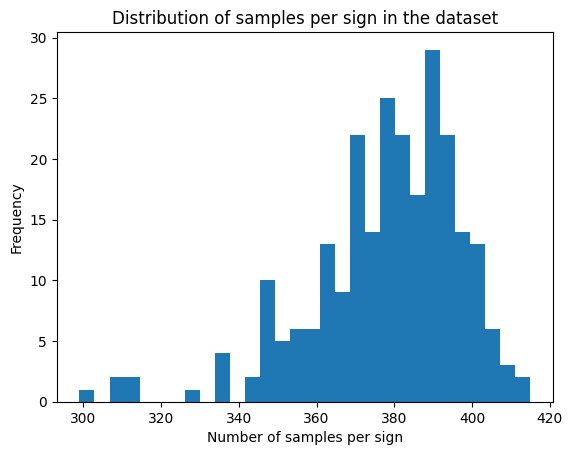

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['file_count'], bins=30)
plt.xlabel('Number of samples per sign')
plt.ylabel('Frequency')
plt.title('Distribution of samples per sign in the dataset')
plt.show()